<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цель проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#План-работы" data-toc-modified-id="План-работы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>План работы</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Тренды-и-сезонность" data-toc-modified-id="Тренды-и-сезонность-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Тренды и сезонность</a></span></li><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Подготовка-выборок-для-обучения-моделей" data-toc-modified-id="Подготовка-выборок-для-обучения-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подготовка выборок для обучения моделей</a></span></li></ul></li><li><span><a href="#Обучение-разных-моделей" data-toc-modified-id="Обучение-разных-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение разных моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-LinearRegression" data-toc-modified-id="Модель-LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Модель LinearRegression</a></span></li><li><span><a href="#Модель-LGBMRegressor" data-toc-modified-id="Модель-LGBMRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель LGBMRegressor</a></span></li><li><span><a href="#Модель-CatBoostRegressor" data-toc-modified-id="Модель-CatBoostRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Модель CatBoostRegressor</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

## Описание проекта

В данном проекте необходимо для таксопарка спрогнозировать количество заказов такси на следующий час, чтобы привлекать больше водителей в период пиковой нагрузки. Для такого предсказания будет построена модель.
Значение метрики RMSE на тестовой выборке должно быть не больше 48.

### Цель проекта

Построение модели прогнозирования количества заказов такси на следующий час.

### Описание данных

В данных 2 столбца:

- `datetime`- время и дата;

- `num_orders` - количество заказов такси.

### План работы

1 Подготовка данных

2 Анализ данных

3 Обучение разных моделей

4 Тестирование лучшей модели

5 Общий вывод

## Подготовка данных

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import catboost as cb

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder
)
from sklearn.model_selection import (
    train_test_split,
    TimeSeriesSplit,
    GridSearchCV
)
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
import time

In [3]:
#вывод первых 10 строчек датафрейма
df.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


In [4]:
#вывод основной информации о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
#проверим пропуски в столбцах
df.isna().sum()

num_orders    0
dtype: int64

In [6]:
#отсортируем данные
df.sort_index(inplace=True)
df

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [7]:
#проверим, что индекс монотонный
df.index.is_monotonic

True

In [8]:
#проведем ресемплирование по 1 часу
df = df.resample('1H').sum()
df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


In [9]:
#вывод основной информации об обновленном датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


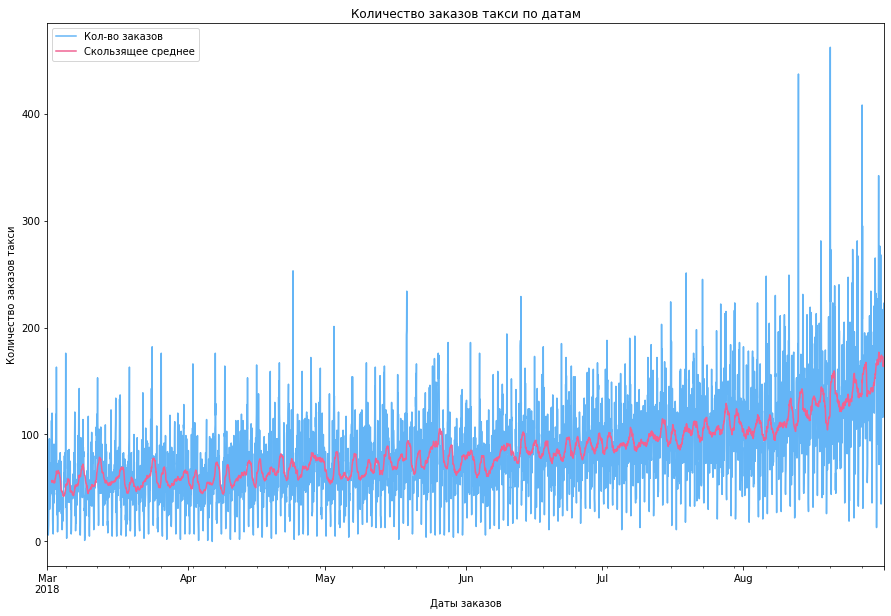

In [10]:
#построим график количества заказов по датам
df.plot(figsize=(15, 10), ax=plt.gca(), color='#64B5F6')
df.rolling(24).mean().plot(ax=plt.gca(), color='#F06292')
plt.xlabel('Даты заказов')
plt.ylabel('Количество заказов такси')
plt.title('Количество заказов такси по датам')
plt.legend(['Кол-во заказов', 'Скользящее среднее'])
plt.show()

В данном разделе были открыты и изучены данные. Пропусков в данных нет, индекс даты - монотонный (даты идут в хронологическом порядке). Далее было произведено ресемплирование по 1 часу, добавлен столбец со скользящим средним с окном 24 часа и построен график ресемплированных данных и скользящего среднего.

## Анализ данных

### Тренды и сезонность

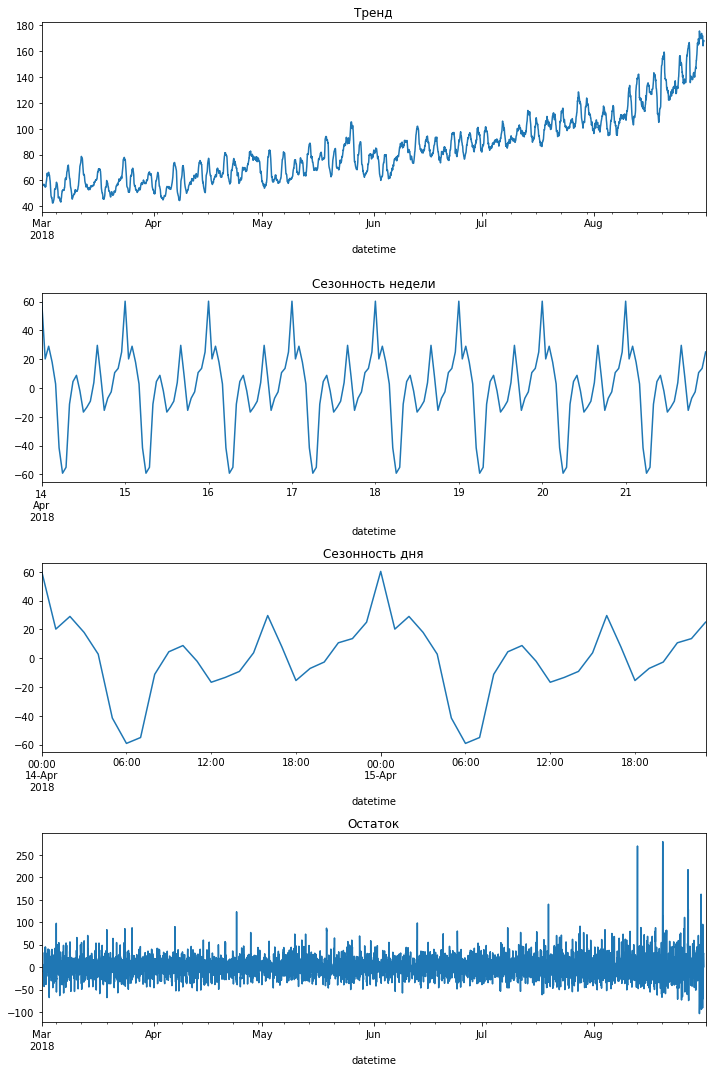

In [11]:
#посмотрим тренды и сезонность и построим их графики
decomposed = seasonal_decompose(df)

plt.figure(figsize=(10, 15))
plt.subplot(411)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')
plt.subplot(412)
decomposed.seasonal['2018-04-14':'2018-04-21'].plot(ax=plt.gca()) 
plt.title('Сезонность недели')
plt.subplot(413)
decomposed.seasonal['2018-04-14':'2018-04-15'].plot(ax=plt.gca()) 
plt.title('Сезонность дня')
plt.subplot(414)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Остаток')
plt.tight_layout()

Графики показывают, что тренд идет на увеличение заказов такси, сезонность - 24 часа, максимальный пик заказов - ночью (около 00:00), утром - минимум.

### Создание признаков

In [12]:
'''функция для создания признаков для временных рядов'''

def make_features(df, max_lag, rolling_mean_size):
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
    lags_to_try = [1,2,23,24,25]

    for lag in lags_to_try:
        df['lag{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()

#берем скользящее среднее по сезонности 24ч и отстающие значения на 1ч, 2ч, 23ч, 24ч, 25ч
make_features(df, 5, 24) 
df

,num_orders,day,dayofweek,hour,lag1,lag2,lag23,lag24,lag25,rolling_mean
datetime,,,,,,,,,,
2018-03-01 00:00:00,124,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,1,3,2,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,1,3,3,71.0,85.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,1,3,4,66.0,71.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,31,4,19,207.0,217.0,142.0,72.0,177.0,164.875000
2018-08-31 20:00:00,154,31,4,20,136.0,207.0,198.0,142.0,72.0,167.541667
2018-08-31 21:00:00,159,31,4,21,154.0,136.0,158.0,198.0,142.0,168.041667


In [13]:
#удалим пропущенные значения и проверим размер датафрейма
df = df.dropna()
df.shape

(4391, 10)

В данном пункте были созданы следующие признаки для обучения моделей: `day`, `dayofweek`, `hour`, `lag1`, `lag2`,  `lag23`, `lag24`, `lag25`, `rolling_mean`.

Кроме того были удалены строки с получившимися нулевыми значениями.

### Подготовка выборок для обучения моделей

In [14]:
#разделим данные на признаки и целевой признак
features = df.drop(['num_orders'], axis=1)
target = df['num_orders']

#разделим выборки на обучающую 90% и тестовую 10%
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=12345, shuffle=False
)

#проверим размеры выборок
print(features_train.shape)
print(target_train.shape)
print()
print(features_test.shape)
print(target_test.shape)

#проверим правильность разбиения выборок
print()
print(features_train.index.min(), features_train.index.max())
print(features_test.index.min(), features_test.index.max())
print()
print(target_train.index.min(), target_train.index.max())
print(target_test.index.min(), target_test.index.max())

(3951, 9)
(3951,)

(440, 9)
(440,)

2018-03-02 01:00:00 2018-08-13 15:00:00
2018-08-13 16:00:00 2018-08-31 23:00:00

2018-03-02 01:00:00 2018-08-13 15:00:00
2018-08-13 16:00:00 2018-08-31 23:00:00


In [15]:
#создадим переменные для кодирования выборок для линейной регрессии
features_train_lin = features_train.copy()
features_test_lin = features_test.copy()

#категориальные признаки для OHE
features_train_lin[['day', 'dayofweek', 'hour']] = features_train_lin[['day', 'dayofweek', 'hour']].astype('object')
features_test_lin[['day', 'dayofweek', 'hour']] = features_test_lin[['day', 'dayofweek', 'hour']].astype('object')
ohe_features_lin = features_train_lin.select_dtypes(include='object').columns.to_list()
print(ohe_features_lin)

#численные признаки
num_features = features_train_lin.select_dtypes(exclude='object').columns.to_list()
print(num_features)

['day', 'dayofweek', 'hour']
['lag1', 'lag2', 'lag23', 'lag24', 'lag25', 'rolling_mean']


In [17]:
#закодируем категориальные и численные признаки для линейной регрессии
col_transformer_lin = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore'),
        ohe_features_lin
    ),
    (
        StandardScaler(), 
        num_features
    ),
    remainder='passthrough',
    verbose_feature_names_out=False
)


features_train_lin = pd.DataFrame.sparse.from_spmatrix(
    col_transformer_lin.fit_transform(features_train_lin),
    columns=col_transformer_lin.get_feature_names_out()
)

#проверим
features_train_lin.head()

,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,...,hour_20,hour_21,hour_22,hour_23,lag1,lag2,lag23,lag24,lag25,rolling_mean
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.299200,-0.527823,-0.182812,0.185737,1.211874,-1.179058
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.074799,0.299492,-0.314243,-0.182449,0.185951,-1.103604
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.088599,1.075099,-0.918824,-0.313944,-0.182329,-1.094981
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.372985,-0.088312,-1.891411,-0.918820,-0.313858,-1.099292
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.510529,-0.372701,-1.733694,-1.891882,-0.918889,-1.148877


In [18]:
# трансформируем тестовую выборку
features_test_lin = pd.DataFrame.sparse.from_spmatrix(
    col_transformer_lin.transform(features_test_lin),
    columns=col_transformer_lin.get_feature_names_out()
)

#проверим
features_test_lin.head()

,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,...,hour_20,hour_21,hour_22,hour_23,lag1,lag2,lag23,lag24,lag25,rolling_mean
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.496729,0.609735,0.973778,1.974067,1.869517,3.173574
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.695277,2.497046,0.001191,0.974706,1.974740,3.154171
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.902104,1.695585,0.106335,0.001644,0.975123,3.233937
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.661146,1.902414,0.526914,0.106840,0.001811,3.289989
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.325054,0.661442,1.499500,0.527624,0.107034,3.309392


В данном пункте были выделены выборки признаков и целевого признака. Далее выборки были разделены на тренировочную (_90%_) и тестовую части(_10%_).  Было выполнено прямое кодирование _OneHotEncoder_ для категориальных признаков и масштабирование _StandardScaler_ для численных признаков для линейной регрессии.

## Обучение разных моделей

### Модель LinearRegression

In [19]:
#обучим модель LinearRegression
estimator = LinearRegression()
param_grid= {
    'n_jobs': [-1]
}
tcv = TimeSeriesSplit()
model = GridSearchCV(estimator=estimator, 
                     param_grid=param_grid, 
                     scoring='neg_root_mean_squared_error',
                     cv=tcv)

model.fit(features_train_lin, target_train)


best_model_lr = model.best_estimator_
print(best_model_lr)
b_sc = model.best_score_

print('RMSE:', f'{-b_sc:.3f}')

LinearRegression(n_jobs=-1)
RMSE: 26.091


### Модель LGBMRegressor

In [20]:
#обучим модель LGBMRegressor
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': range(50, 251, 50),
    'max_depth': range(1, 11),
}
estimator = lgb.LGBMRegressor(objective='regression', random_state=12345)

tcv = TimeSeriesSplit(n_splits=3)

cat_columns = ['day', 'dayofweek', 'hour']

features_train[cat_columns] = features_train[cat_columns].astype("category")


model = GridSearchCV(estimator=estimator,
                     param_grid=param_grid,
                     cv=tcv, 
                     n_jobs=-1, 
                     scoring='neg_root_mean_squared_error')

model.fit(features_train, target_train)


best_model_lgbm = model.best_estimator_
print(best_model_lgbm)
print('Параметры модели:', model.best_params_)
b_sc = model.best_score_

print('RMSE:', f'{-b_sc:.3f}')

LGBMRegressor(max_depth=2, objective='regression', random_state=12345)
Параметры модели: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
RMSE: 27.319


### Модель CatBoostRegressor

In [21]:
#обучим модель CatBoostRegressor

param_grid = {
    'learning_rate': [0.01, 0.1],
    'depth': range(1, 11),
    'n_estimators': range(50, 251, 50)
}

estimator = CatBoostRegressor()

cat_features = ['day', 'dayofweek', 'hour']

tcv = TimeSeriesSplit(n_splits=3)

model = GridSearchCV(estimator=estimator,
                     param_grid=param_grid,
                     cv=tcv, 
                     n_jobs=-1, 
                     scoring='neg_root_mean_squared_error')

model.fit(features_train, target_train, cat_features=cat_features, verbose=False)


best_model_cat = model.best_estimator_
print('Параметры модели:', model.best_params_)
print(best_model_cat)
b_sc = model.best_score_

print('RMSE:', f'{-b_sc:.3f}')

Параметры модели: {'depth': 3, 'learning_rate': 0.1, 'n_estimators': 150}
RMSE: 26.631


В данном разделе были обучены 3 модели и получены следующие результаты метрики RMSE:
- LinearRegression: **26.091**,
- LGBMRegressor: **27.319**,
- CatBoostRegressor: **26.631**.

Лучший результат показала модель _LinearRegression_. Именно она будет проверена на тестовой выборке.

## Тестирование лучшей модели

In [22]:
#обучим лучшую модель LinearRegression()

best_model = LinearRegression()

best_model.fit(features_train_lin, target_train)

predicted = best_model.predict(features_test_lin)

print('RMSE:', f'{mean_squared_error(target_test, predicted, squared=False):.3f}')

RMSE: 42.156


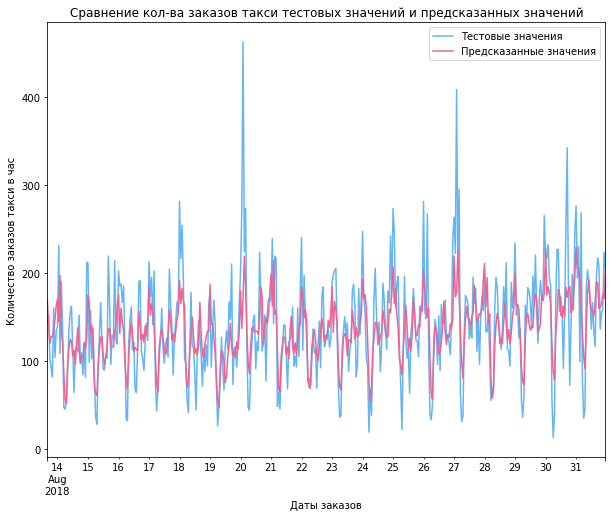

In [23]:
#построим график сравнения предсказанных значений и тестовых
pred = pd.DataFrame(predicted, columns=['num_orders'], index=target_test.index)
target_test.plot(figsize=(10, 8), ax=plt.gca(), color='#64B5F6')
pred.plot(ax=plt.gca(), color='#F06292')
plt.xlabel('Даты заказов')
plt.ylabel('Количество заказов такси в час')
plt.title('Сравнение кол-ва заказов такси тестовых значений и предсказанных значений')
plt.legend(['Тестовые значения', 'Предсказанные значения'])
plt.show()

Проверим качество прогноза.

In [24]:
print("Средний объём заказов в час:", f'{target_test.mean():.3f}')

#оценим модель первым способом — прогнозом константой.
pred_median = np.ones(target_test.shape) * target_train.median()
print('RMSE(прогноз константой):', f'{mean_squared_error(target_test, pred_median, squared=False):.3f}')

#оценим модель вторым способом — предыдущим значением ряда

pred_previous = target_test.shift()
pred_previous.iloc[0] = target_train.iloc[-1]

print('RMSE(прогноз предыдущим значением ряда):', f'{mean_squared_error(target_test, pred_previous, squared=False):.3f}')

Средний объём заказов в час: 139.561
RMSE(прогноз константой): 87.211
RMSE(прогноз предыдущим значением ряда): 58.882


В данном разделе была протестирована лучшая модель _LinearRegression_. 

Полученное значение метрики RMSE - **42.156**.

Кроме того, было проверено качество модели: прогнозом-константой и предыдущим значением ряда. Значение метрик RMSE: **87.211** и **58.882** соответственно. 

Очевидно, что результат у модели адекватный.

## Общий вывод

В данном проекте было необходимо для компании «Чётенькое такси» спрогнозировать количество заказов такси на следующий час, чтобы привлекать больше водителей в период пиковой нагрузки. Для такого предсказания была построена модель.
Значение метрики RMSE на тестовой выборке не должно было превысиь 48.

Сначала были открыты и изучены данные. Пропусков в данных не оказалось, индекс даты - монотонный (даты идут в хронологическом порядке). Далее было произведено ресемплирование по 1 часу, добавлен столбец со скользящим средним с окном 24 часа и построен график ресемплированных данных и скользящего среднего.

Затем были построены графики тренда, сезонности(неделя и 2 дня) и остатка. Графики показали, что тренд идет на увеличение заказов такси, сезонность - 24 часа, максимальный пик заказов - ночью (около 00:00), утром - минимум.

Далее были созданы следующие признаки для обучения моделей: `day`, `dayofweek`, `hour`, `lag1`, `lag2`,  `lag23`, `lag24`, `lag25`, `rolling_mean`.

Кроме того были удалены строки с получившимися нулевыми значениями.

Затем были выделены выборки признаков и целевого признака. Далее выборки были разделены на тренировочную (_90%_) и тестовую части(_10%_).  Было выполнено прямое кодирование _OneHotEncoder_ для категориальных признаков и масштабирование _StandardScaler_ для численных признаков для линейной регрессии.

Далее были обучены 3 модели и получены следующие результаты метрики RMSE:
- LinearRegression: **26.091**,
- LGBMRegressor: **27.319**,
- CatBoostRegressor: **26.631**.

Лучший результат показала модель _LinearRegression_. Именно она и была проверена на тестовой выборке.

Потом была протестирована лучшая модель _LinearRegression_. 

Полученное значение метрики RMSE - **42.156**.

Кроме того, было проверено качество модели: прогнозом-константой и предыдущим значением ряда. Значение метрик RMSE: **87.211** и **58.882** соответственно. 

Был сделан вывод, что результат у модели адекватный.

В итоге, для компании «Чётенькое такси»  можно рекомендовать следующую модель, отвечающую важным для заказчика критериям (_RMSE < 48_):
- _LinearRegression_ cо значением метрики RMSE - **42.156**.